In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df = pd.read_csv('full_train_cleaned.csv')

## GRAF WITH LENGTH CORRELATION 

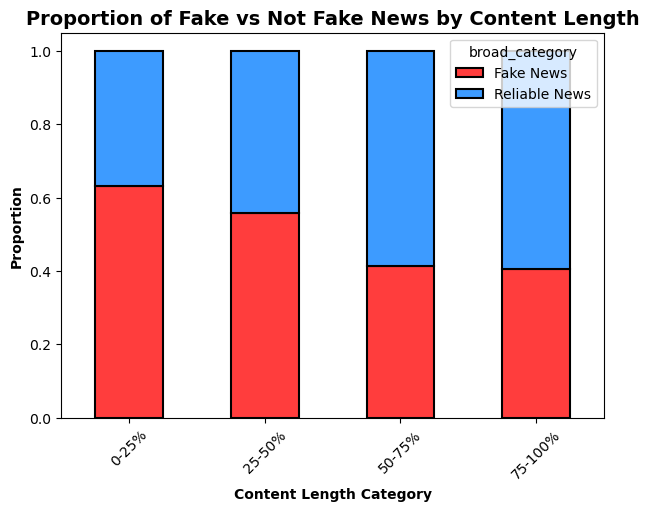

In [5]:

df['content'] = df['content'].astype(str) # content to type string
df['content_length'] = df['content'].apply(len)


# create new lengthcategory column, consiting of 4 intervals. 
df['length_category'] = pd.qcut(df['content_length'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])


# calculating distribution of fake or reliable news across different length categories.
category_correlation = pd.crosstab(index=df['length_category'], columns=df['broad_category'], normalize='index')

# Calculate correlation - Chi-square test to assess independence
contingency_table = pd.crosstab(index=df['length_category'], columns=df['broad_category'])


   

# Plotting the proportions
colors = ['#ff3d3d', '#3d9bff'] 

ax = category_correlation.plot(kind='bar', stacked=True, color=colors,
                               linewidth=1.5, edgecolor='black')
plt.title('Proportion of Fake vs Not Fake News by Content Length', fontsize=14,fontweight='bold')
plt.xlabel('Content Length Category',fontweight='bold')
plt.ylabel('Proportion',fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gcf().set_size_inches(7, 5)
plt.show()

### Chart description
This chart illustrates the correlation between the length of articles and their classification under the broad category label. The data has been meticulously organized by article length and segmented into four equal quartiles, as indicated by the respective percentage labels. This visualization represents 10% of the larger article corpus.


## GRAF WITH THE 10.000 MOST OCCURING WORDS 


In [ ]:



#joining all content colummns to one long string.
cleaned_string = '\n'.join(df["content"].astype(str))

#make list
cleaned_list=cleaned_string.split() 

print("cleaned vocabulary",len(set(cleaned_list)))   #make list to set, elements only appear once

cleaned_antal_ord = Counter(cleaned_list) 

cleaned vocabulary 1569236


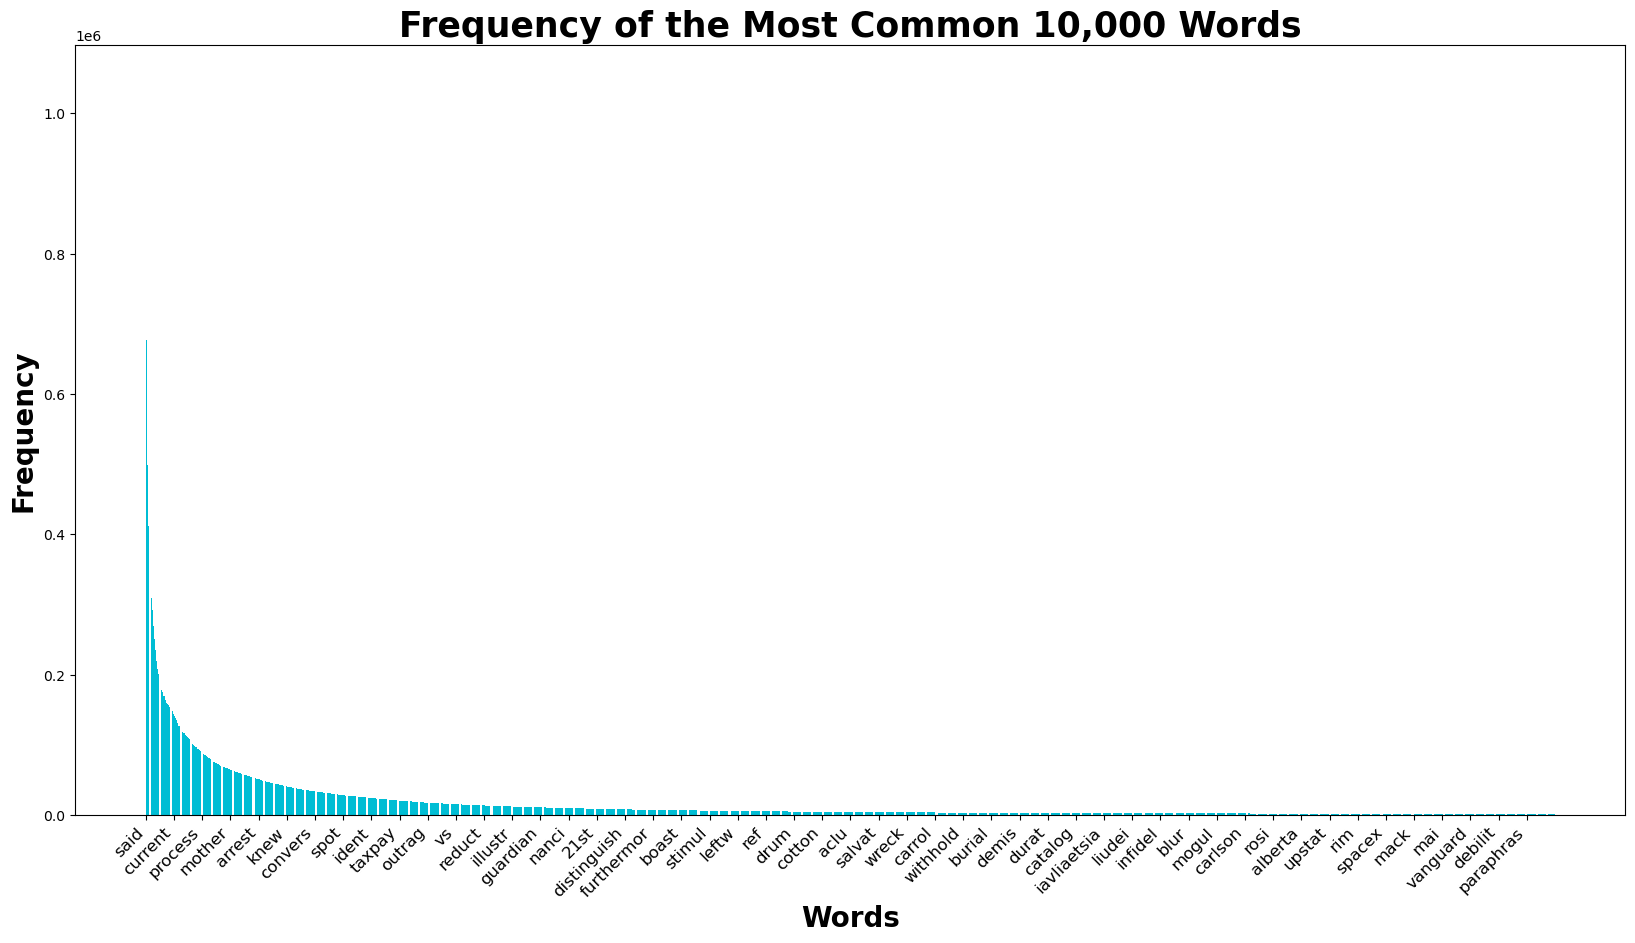

In [ ]:
frequent_words = cleaned_antal_ord.most_common(10000)   # The 10,000 most frequent words
ord = [o for o, t in frequent_words]                    # Extract words
antal = [t for o, t in frequent_words]                  # Extract counts

# Plot settings
plt.figure(figsize=(20, 10))  # size
plt.bar(ord, antal, color='#00bdd4')  # color
plt.xticks(range(0, len(ord), 200), [ord[i] for i in range(0, len(ord), 200)], rotation=45, ha='right', fontsize=12)  # x axis, with rotated words only displaying every 200'th word. 
plt.xlabel('Words',fontsize=20,fontweight='bold')
plt.ylabel('Frequency',fontsize=20,fontweight='bold')
plt.title('Frequency of the Most Common 10,000 Words',fontsize=25,fontweight='bold')
plt.show()

## Chart description 

This graph displays the frequency of the top 50 most common words found in "content" column from the large article-corpus. The words are plotted on the x-axis against their frequency on the y-axis.



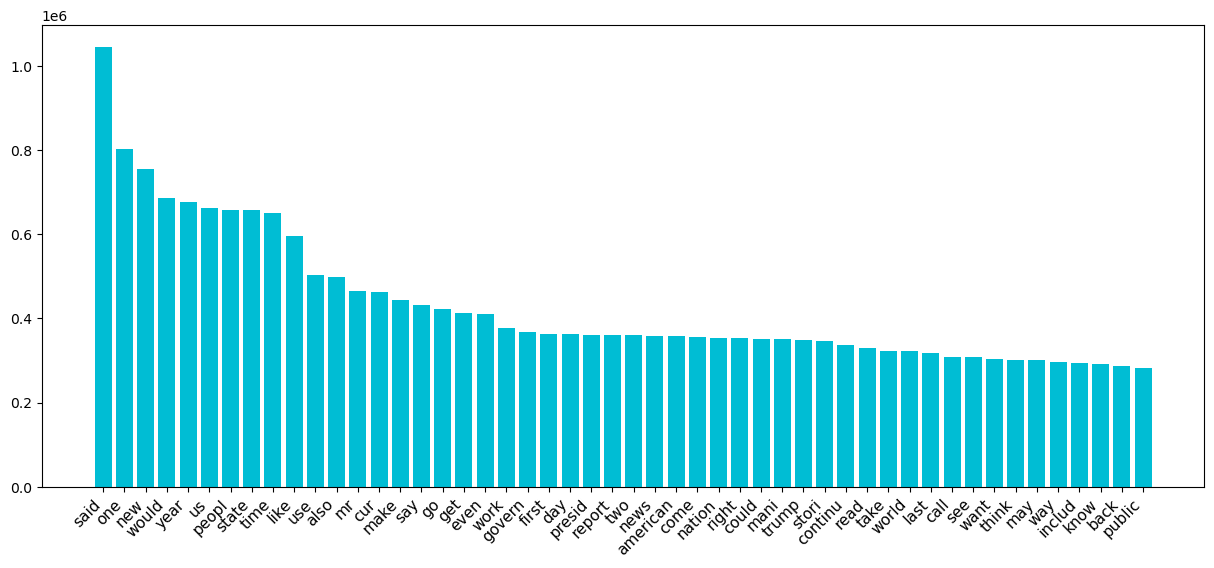

In [ ]:
frequent_words = cleaned_antal_ord.most_common(50)   # The 10,000 most frequent words
ord = [o for o, t in frequent_words]                    # Extract words
antal = [t for o, t in frequent_words]                  # Extract counts


plt.figure(figsize=(15, 6))                             #size
plt.bar(ord, antal, color = "#00bdd4")                  #' ord' og 'antal' as input on x and y axis in plot   
plt.xticks(rotation=45, ha='right', fontsize=11) #displaying now all words, with rotation of words
plt.show()

In [13]:
df['content'] = df['content'].astype(str)
df['content_length'] = df['content'].apply(len)

In [ ]:
type_length_summary = df.groupby('type')['content_length'].agg(['mean', 'median', 'std', 'count', 'min', 'max']) #basic statistics

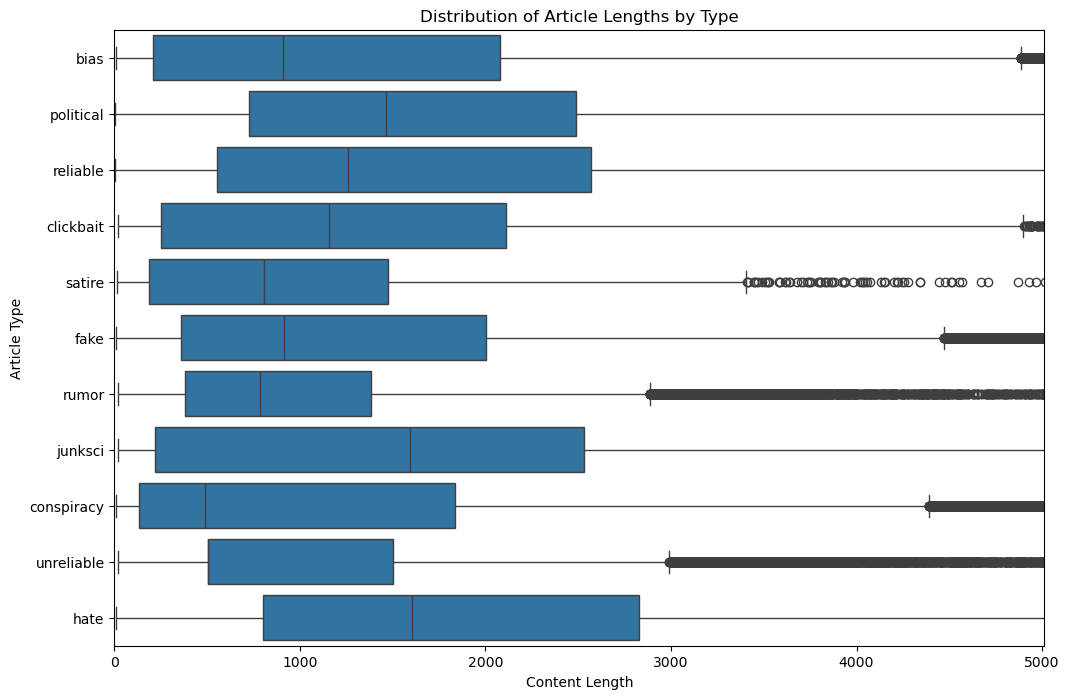

In [ ]:
# BoxPlot with statistical values for length and types
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='content_length', y='type', data=df)
ax.set_xlim(0, df['content_length'].quantile(0.95))  # Adjust to 95% for better visualtion, as there was outlier (max)
plt.title('Distribution of Article Lengths by Type')
plt.xlabel('Content Length')
plt.ylabel('Article Type')
plt.show()

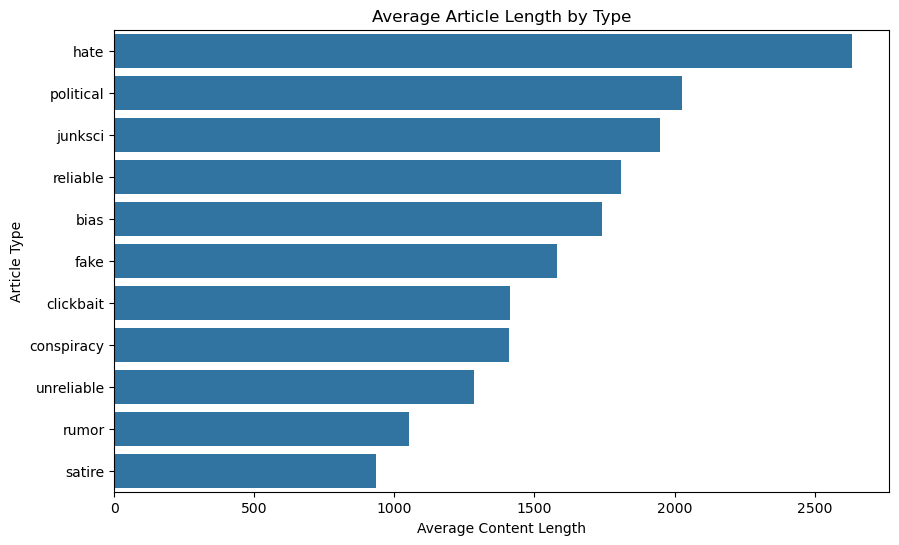

In [ ]:
#Graph with all averages of length for all types

plt.figure(figsize=(10, 6))
sorted_types = type_length_summary.sort_values(by='mean', ascending=False).reset_index() #sorting in descending order
sns.barplot(x='mean', y='type', data=sorted_types)
plt.title('Average Article Length by Type')
plt.xlabel('Average Content Length')
plt.ylabel('Article Type')
plt.show()


In [ ]:
#Author-presence correlation with fake or not fake
df['author_present'] = df['authors'].notna().astype(int)

df['category_encoded'] = df['broad_category'].map({'Fake News': 0, 'Reliable News': 1})

correlation = df['author_present'].corr(df['category_encoded'],method='pearson')
print("Correlation between author presence and category:", correlation)

Correlation between author presence and category: 0.17114397950311871
